In [108]:
%matplotlib inline

import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
from PIL import Image
from matplotlib.pyplot import imshow
from scipy import interpolate

In [134]:
def getGraphData(data):
    x =[]
    x_length = len(data["0"]["x"])
    for i in range(x_length):
        x.append(data["0"]["x"][i])
    mean = []
    variance = []
    sd = []
    length = len(data["0"]["y"])
    for j in range(length):
        dataarray = []
        for i in data:
            dataarray.append(data[i]["y"][j])
        mean.append(np.mean(dataarray))
        variance.append(np.var(dataarray))
        
        sd.append(np.std(dataarray)/np.sqrt(np.prod(np.array(dataarray).shape)))
        
    stdUp = np.add(mean ,sd)
    stdDown = np.subtract(mean ,sd)
    
    return x,mean,stdUp,stdDown 

def accrossGlimpse(data):
    glimpse = [1, 2, 3, 4, 5, 6]
    mean = []
    length = len(data["0"]["y"])
    #print(data["0"]["y"][0])   
    dataArray =[]
    for i in data:   
        for j in range(length):
            data[i]["y"][j] = np.mean(data[i]["y"][j], axis=1) 
        dataArray.append(data[i]["y"])
    
    mean = np.mean(dataArray, axis=0)
    #print(data["0"]["y"][1])
    #print(data["0"]["y"][199])
    #print(mean.shape)
    return glimpse,mean

def buildRewardGraph(file):
    data = json.load(open(file))
    x,mean,stdUp,stdDown = getGraphData(data)
    plt.rc('font',size=14)
    plt.xlim(0,50000)
    plt.plot(x, mean)
    plt.legend(loc='best')
    plt.xlabel('Epochs')
    plt.ylabel('Average Intrinsic Reward')
    #plt.ylim(plt.ylim()[0], 1.0)
    #plt.yticks(np.arange(0, 1.0, 0.1))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tight_layout()
    plt.fill_between(x, stdUp, stdDown, alpha='0.5')
    plt.savefig("Reward as a function of epochs")
    

def buildGraphGlimpse(file):
    concrete_reward = json.load(open(file))
    glimpse ,mean_glimpse= accrossGlimpse(concrete_reward)
    glimpse_new = np.linspace(np.array(glimpse).min(),np.array(glimpse).max(),6)
    plots = [1,5,9,13,199]
    print(glimpse)
    for i in plots:
        f = interpolate.interp1d(glimpse,mean_glimpse[i])
        glimpse_New =  np.arange(1, 6, 0.01)
        ynew = f(glimpse_New)
        plt.plot(glimpse_New, ynew, label="Epoch " + str((i+1)*500))
#     mean_glimpse = spline(glimpse,mean_glimpse,glimpse_new)
#     plt.plot(glimpse, mean_glimpse[1], label="Epoch 1000")
#     plt.plot(glimpse, mean_glimpse[5], label="Epoch 3000")
#     #plt.plot(glimpse, mean_glimpse[7], label="Epoch 3500")
#     plt.plot(glimpse, mean_glimpse[9], label="Epoch 5000")
#     plt.plot(glimpse, mean_glimpse[12], label="Epoch 6500")
#     plt.plot(glimpse, mean_glimpse[39], label="Epoch 15000")
#     plt.plot(glimpse, mean_glimpse[199], label="Epoch 100000")
#     #plt.suptitle('Average Intrinsic Reward over the glimpse')
    plt.xlabel('Glimpse Number')
    plt.ylabel('Average Intrinsic Reward')
    plt.legend(loc='best')
    plt.savefig('Average Intrinsic Reward Glimpses.eps')
    plt.show()

C:\Users\adity\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


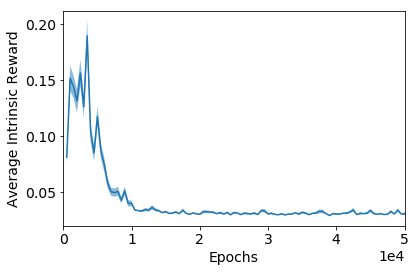

In [135]:
buildRewardGraph('concreteDropout_rewards.json')

[1, 2, 3, 4, 5, 6]


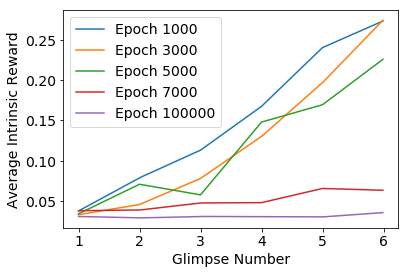

In [136]:
buildGraphGlimpse('concreteDropout_rewards.json')
# concrete_reward = json.load(open('concreteDropout_rewards.json'))
# glimpse ,mean_glimpse,variance_mg = accrossGlimpse(concrete_reward)

